# Legger inn feil i CSV

### Legger inn Nan , og ekstreme verdier, lagrer som ny CSV fil

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("trondheim_vaerdata_full.csv", parse_dates=['Tidspunkt'])

#Legger til Nan verdier, ekstreme verdier, og ugyldige datatyper (feks tekst der det skal være tall)

#legger inn Nan verdier
df_feil = df.copy() #kopierer csv_fil
df_feil.loc[10:15, 'mean(air_temperature P1D)'] = np.nan
df_feil.loc[50:55, 'mean(wind_speed P1D)'] = np.nan

#legger inn noen ekstreme verdier
df_feil = df.copy() #kopierer csv_fil
df_feil.loc[100, 'mean(air_temperature P1D)'] = -100
df_feil.loc[110, 'mean(air_temperature P1D)'] = 50

#Legger inn ugyldige datatyper
df_feil.loc[200, 'sum(precipitation_amount P1D)'] = 'ukjent'

#Lagrer den nye filen
df_feil.to_csv("trondheim_vaerdata_feil.csv", index = False)

C:\Users\eriks\AppData\Local\Temp\ipykernel_26384\4208841755.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'ukjent' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_feil.loc[200, 'sum(precipitation_amount P1D)'] = 'ukjent'


### Håndterer feilene

In [3]:
#Retter opp feil i CSV

df_rensa = pd.read_csv("trondheim_vaerdata_feil.csv", parse_dates = ['Tidspunkt'])

#konverterer float til int, feilverdier omgjort til Nan
df_rensa['sum(precipitation_amount P1D)'] = pd.to_numeric(df_rensa['sum(precipitation_amount P1D)'], errors = 'coerce')

#Fjerner ekstreme verdier
df_rensa['mean(air_temperature P1D)'] = df_rensa['mean(air_temperature P1D)'].clip(lower = -50, upper = 50)
df_rensa['mean(wind_speed P1D)'] = df_rensa['mean(wind_speed P1D)'].clip(lower = 0, upper = 150)

#Fyller inn manglende verdier som nå er slettet, bruker interpolasjon
df_rensa['mean(air_temperature P1D)'] = df_rensa['mean(air_temperature P1D)'].interpolate()
df_rensa['mean(wind_speed P1D)'] = df_rensa['mean(wind_speed P1D)'].interpolate()
df_rensa['sum(precipitation_amount P1D)'] = df_rensa['sum(precipitation_amount P1D)'].interpolate()

#Lager en fikset fil med nye verdier
df_rensa.to_csv("trondheim_vaerdata_rensa_versjon.csv", index = False)
print("Filen er rensa")



Filen er rensa


### Plotter visualisering før og etter rensing av feil

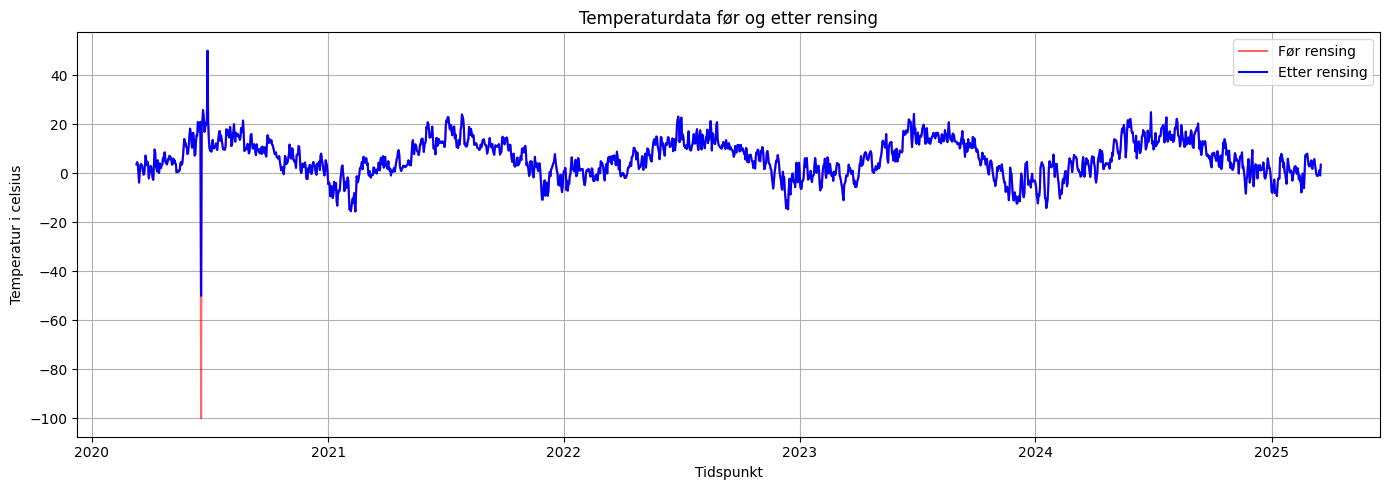

In [4]:

import matplotlib.pyplot as plt
plt.figure(figsize = (14,5))
plt.plot(df_feil['Tidspunkt'], df_feil["mean(air_temperature P1D)"], label = "Før rensing", color = 'red', alpha = 0.6)
plt.plot(df_rensa['Tidspunkt'], df_rensa["mean(air_temperature P1D)"], label = "Etter rensing", color = 'blue')
plt.title("Temperaturdata før og etter rensing")
plt.xlabel("Tidspunkt")
plt.ylabel("Temperatur i celsius")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()